In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

dataset_dir = '/content/drive/My Drive/leukemiadataset/Dataset/CLL'  # Update with your dataset path


dataset_dir_CLL = '/content/drive/My Drive/leukemiadataset/Dataset/Healthy'

dataset_dir_ALL = '/content/drive/My Drive/leukemiadataset/Dataset/ALL'
dataset_dir_AML = '/content/drive/My Drive/leukemiadataset/Dataset/AML'
dataset_dir_CML = '/content/drive/My Drive/leukemiadataset/Dataset/CML'
dataset_dir_MM = '/content/drive/My Drive/leukemiadataset/Dataset/MM'



In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img


In [ ]:
# Load all image paths
image_paths = [os.path.join(dataset_dir, fname) for fname in os.listdir(dataset_dir)]
image_paths_CLL = [os.path.join(dataset_dir_CLL, fname) for fname in os.listdir(dataset_dir_CLL)]
image_paths_ALL = [os.path.join(dataset_dir_ALL, fname) for fname in os.listdir(dataset_dir_ALL)]
image_paths_AML = [os.path.join(dataset_dir_AML, fname) for fname in os.listdir(dataset_dir_AML)]

image_paths_CML = [os.path.join(dataset_dir_CML, fname) for fname in os.listdir(dataset_dir_CML)]
image_paths_MM = [os.path.join(dataset_dir_MM, fname) for fname in os.listdir(dataset_dir_MM)]
print(f"Total images: {len(image_paths)}")

Total images: 400


In [ ]:
def load_and_preprocess_image(img_path, target_size=(180, 180)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array /= 255.0  # Normalize the pixel values
    return img_array

In [ ]:
# Load and preprocess all images

images = np.array([load_and_preprocess_image(img_path) for img_path in image_paths])

image_paths_CLL = np.array([load_and_preprocess_image(img_path) for img_path in image_paths_CLL])
image_paths_ALL = np.array([load_and_preprocess_image(img_path) for img_path in image_paths_ALL])
image_paths_AML = np.array([load_and_preprocess_image(img_path) for img_path in image_paths_AML])
image_paths_CML = np.array([load_and_preprocess_image(img_path) for img_path in image_paths_CML])
image_paths_MM = np.array([load_and_preprocess_image(img_path) for img_path in image_paths_MM])



In [ ]:
data_dir_original= '/content/drive/My Drive/leukemiadataset/Dataset/'

In [ ]:
dataset_dir = data_dir_original

# List all class directories
classes = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]
print(f"Classes found: {classes}")

# Count images in each class
for cls in classes:
    cls_dir = os.path.join(dataset_dir, cls)
    num_images = len([f for f in os.listdir(cls_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])
    print(f"Class '{cls}' has {num_images} images.")


Classes found: ['CLL', 'MM', 'CML', 'Healthy', 'ALL', 'AML']
Class 'CLL' has 400 images.
Class 'MM' has 400 images.
Class 'CML' has 400 images.
Class 'Healthy' has 400 images.
Class 'ALL' has 400 images.
Class 'AML' has 400 images.


In [ ]:
import random
import shutil # Add this line to import the shutil module

# Define the main dataset directory
dataset_dir = '/content/drive/My Drive/leukemiadataset/Dataset'

# Define new directories for split data
base_dir = '/content/drive/My Drive/leukemiadataset/Split_Dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Create directories if they don't exist
for directory in [train_dir, validation_dir, test_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Function to split data
def split_data(class_name, split_ratio=(0.6, 0.2, 0.2)):

    class_dir = os.path.join(dataset_dir, class_name)
    images = [f for f in os.listdir(class_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
    random.shuffle(images)

    total = len(images)
    train_end = int(split_ratio[0] * total)
    val_end = train_end + int(split_ratio[1] * total)

    train_images = images[:train_end]
    val_images = images[train_end:val_end]
    test_images = images[val_end:]

    # Create class subdirectories in train, val, test
    for subset, subset_images in zip(['train', 'validation', 'test'], [train_images, val_images, test_images]):
        subset_dir = os.path.join(base_dir, subset, class_name)
        if not os.path.exists(subset_dir):
            os.makedirs(subset_dir)
        for img in subset_images:
            src = os.path.join(class_dir, img)
            dst = os.path.join(subset_dir, img)
            shutil.copyfile(src, dst)

# Split data for each class
for cls in classes:
    split_data(cls)
    print(f"Data split for class '{cls}' completed.")


Data split for class 'CLL' completed.
Data split for class 'MM' completed.
Data split for class 'CML' completed.
Data split for class 'Healthy' completed.
Data split for class 'ALL' completed.
Data split for class 'AML' completed.


In [ ]:
for subset in ['train', 'validation', 'test']:
    subset_dir = os.path.join(base_dir, subset)
    print(f"\nSubset: {subset}")
    for cls in classes:
        cls_dir = os.path.join(subset_dir, cls)
        num_images = len([f for f in os.listdir(cls_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])
        print(f"  Class '{cls}': {num_images} images")



Subset: train
  Class 'CLL': 338 images
  Class 'MM': 334 images
  Class 'CML': 334 images
  Class 'Healthy': 340 images
  Class 'ALL': 341 images
  Class 'AML': 338 images

Subset: validation
  Class 'CLL': 145 images
  Class 'MM': 145 images
  Class 'CML': 142 images
  Class 'Healthy': 149 images
  Class 'ALL': 146 images
  Class 'AML': 143 images

Subset: test
  Class 'CLL': 142 images
  Class 'MM': 143 images
  Class 'CML': 144 images
  Class 'Healthy': 144 images
  Class 'ALL': 145 images
  Class 'AML': 144 images


In [ ]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(118, 118, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Fully Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(len(classes), activation='softmax')  # Output layer
])

# Display the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 116, 116, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 58, 58, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,769,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,863,046 (10.92 MB)

 Trainable params: 2,863,046 (10.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Example in Keras (TensorFlow)
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')  # num_classes is the number of output classes
])


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

# Load training dataset from directory
train_dataset = train_datagen.flow_from_directory(
    '/content/drive/My Drive/leukemiadataset/Split_Dataset/train',
    target_size=(224, 224),  # Adjust size according to your model input
    batch_size=32,
    class_mode='categorical'  # or 'binary' depending on your labels
)


Found 2025 images belonging to 6 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)

# Load training dataset from directory
val_dataset = val_datagen.flow_from_directory(
    '/content/drive/My Drive/leukemiadataset/Split_Dataset/validation',
    target_size=(224, 224),  # Adjust size according to your model input
    batch_size=32,
    class_mode='categorical'  # or 'binary' depending on your labels
)


Found 870 images belonging to 6 classes.


In [ ]:
# Early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=3,
    callbacks=[early_stopping]
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 685s 10s/step - accuracy: 0.2238 - loss: 2.0046 - val_accuracy: 0.3023 - val_loss: 1.5414
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 633s 10s/step - accuracy: 0.3377 - loss: 1.5438 - val_accuracy: 0.4287 - val_loss: 1.4022
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 677s 10s/step - accuracy: 0.3802 - loss: 1.4321 - val_accuracy: 0.4230 - val_loss: 1.3667
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 621s 10s/step - accuracy: 0.3955 - loss: 1.3941 - val_accuracy: 0.4690 - val_loss: 1.3124
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 629s 10s/step - accuracy: 0.4264 - loss: 1.3430 - val_accuracy: 0.4506 - val_loss: 1.2900


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def leukemia_cnn_model(input_shape=(128, 128, 3), num_classes=6):
    model = Sequential()

    # Layer 1
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 2
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 3
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))  # Softmax for multi-class classification

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model
# Assuming the model is already defined as above
cnn_model = leukemia_cnn_model(input_shape=(128, 128, 3), num_classes=6)

# Summarize the model structure
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      16,777,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,874,054 (64.37 MB)

 Trainable params: 16,874,054 (64.37 MB)

 Non-trainable params: 0 (0.00 B)

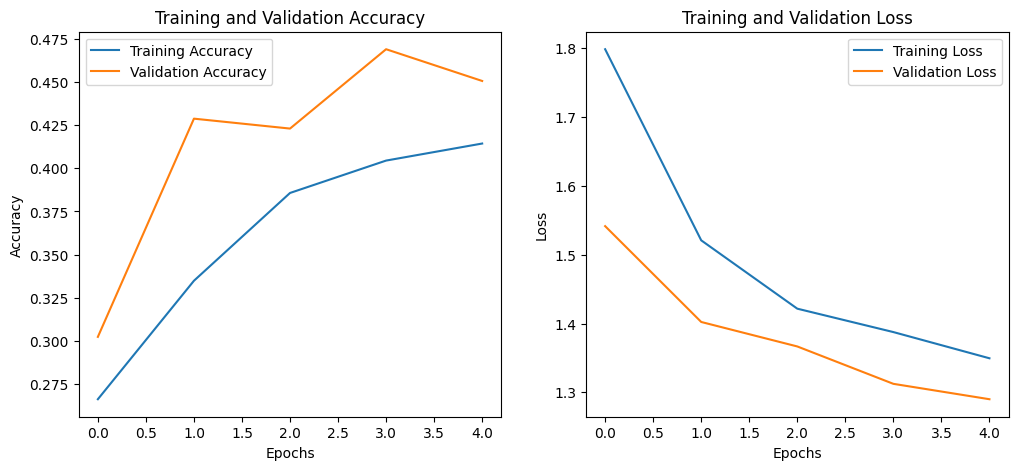

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
# Plotting Accuracy Curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss Curves
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array

# Assuming 'test_dir' is the path to your test directory
test_datagen = ImageDataGenerator(rescale=1./255)  # Create a data generator for test data

test_dataset = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # Match the input shape of your model
    batch_size=32,          # Adjust as needed
    class_mode='categorical', # or 'binary' depending on your labels
    shuffle=False             # Important for consistent predictions
)

# Predict class probabilities
y_pred_prob = cnn_model.predict(test_dataset)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

Found 862 images belonging to 6 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 149s 6s/step


In [ ]:
# Step 2: Get true labels from the validation data
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# Step 3: Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Step 4: Plot confusion matrix using Seaborn for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Optionally, print classification report
print(classification_report(y_true, y_pred_classes, target_names=class_names))


In [ ]:
#You can try

# 1. Data Augmentation:
#   - Implement more aggressive data augmentation techniques.
#   - Explore techniques like random cropping, rotations, flips, color jittering, etc.
#   - Increase the size of your training dataset effectively.

# Example:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# 2. Transfer Learning with Fine-Tuning:
#   - Unfreeze some of the top layers of the pre-trained model.
#   - Train these layers along with your custom layers with a lower learning rate.
#   - Allows the pre-trained model to adapt to your specific dataset.

# Example:
for layer in base_model.layers[:100]:  # Unfreeze the top 100 layers
    layer.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# 3. Hyperparameter Optimization:
#   - Use techniques like Grid Search or Random Search to find optimal hyperparameters.
#   - Tune learning rate, batch size, optimizer, dropout rate, etc.
#   - Find the best configuration for your specific model and dataset.

# Example:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'dropout_rate': [0.3, 0.5]
}
grid_search = GridSearchCV(estimator=cnn_model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(train_dataset, train_dataset)


# 4. Regularization Techniques:
#   - Use techniques like L1 or L2 regularization or dropout to prevent overfitting.
#   - Dropout randomly deactivates neurons during training, improving generalization.
#   - Reduce the complexity of your model and improve its ability to generalize.

# Example:
# Already in your model
model.add(Dropout(0.5))

# 5. Ensemble Methods:
#   - Train multiple CNN models with different architectures or initializations.
#   - Combine their predictions to improve accuracy and robustness.
#   - Use methods like bagging or boosting to ensemble models.


# Example:
# You will need to train multiple models
from sklearn.ensemble import VotingClassifier

model1 = leukemia_cnn_model(input_shape=(128, 128, 3), num_classes=6)
model2 = leukemia_cnn_model(input_shape=(128, 128, 3), num_classes=6)

ensemble_model = VotingClassifier(estimators=[('model1', model1), ('model2', model2)], voting='soft')
ensemble_model.fit(train_dataset, train_dataset)
